# Import library

In [1]:
import numpy as np
import tensorflow as tf
import math
import logging
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import KFold
from numpy import sqrt

# Load Datasets

In [2]:
# Please change the file path to the location that where the concrete dataset located.
# data = pd.read_excel("Concrete_Data.xls")
data = pd.read_excel("Concrete_Data.xls")
data.shape

(1030, 9)

# Show Dataset Information

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

# Data Cleaning and Preprocessing

In [6]:
# Fucntion to check null value in the data
isnull = data.isnull()
print(isnull)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
...                                         ...   
1025                                      False   
1026                                      False   
1027                                      False   
1028                                      False   
1029                                      False   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...      

In [7]:
# Remove the row that contain null values and duplicate data
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.shape

(1005, 9)

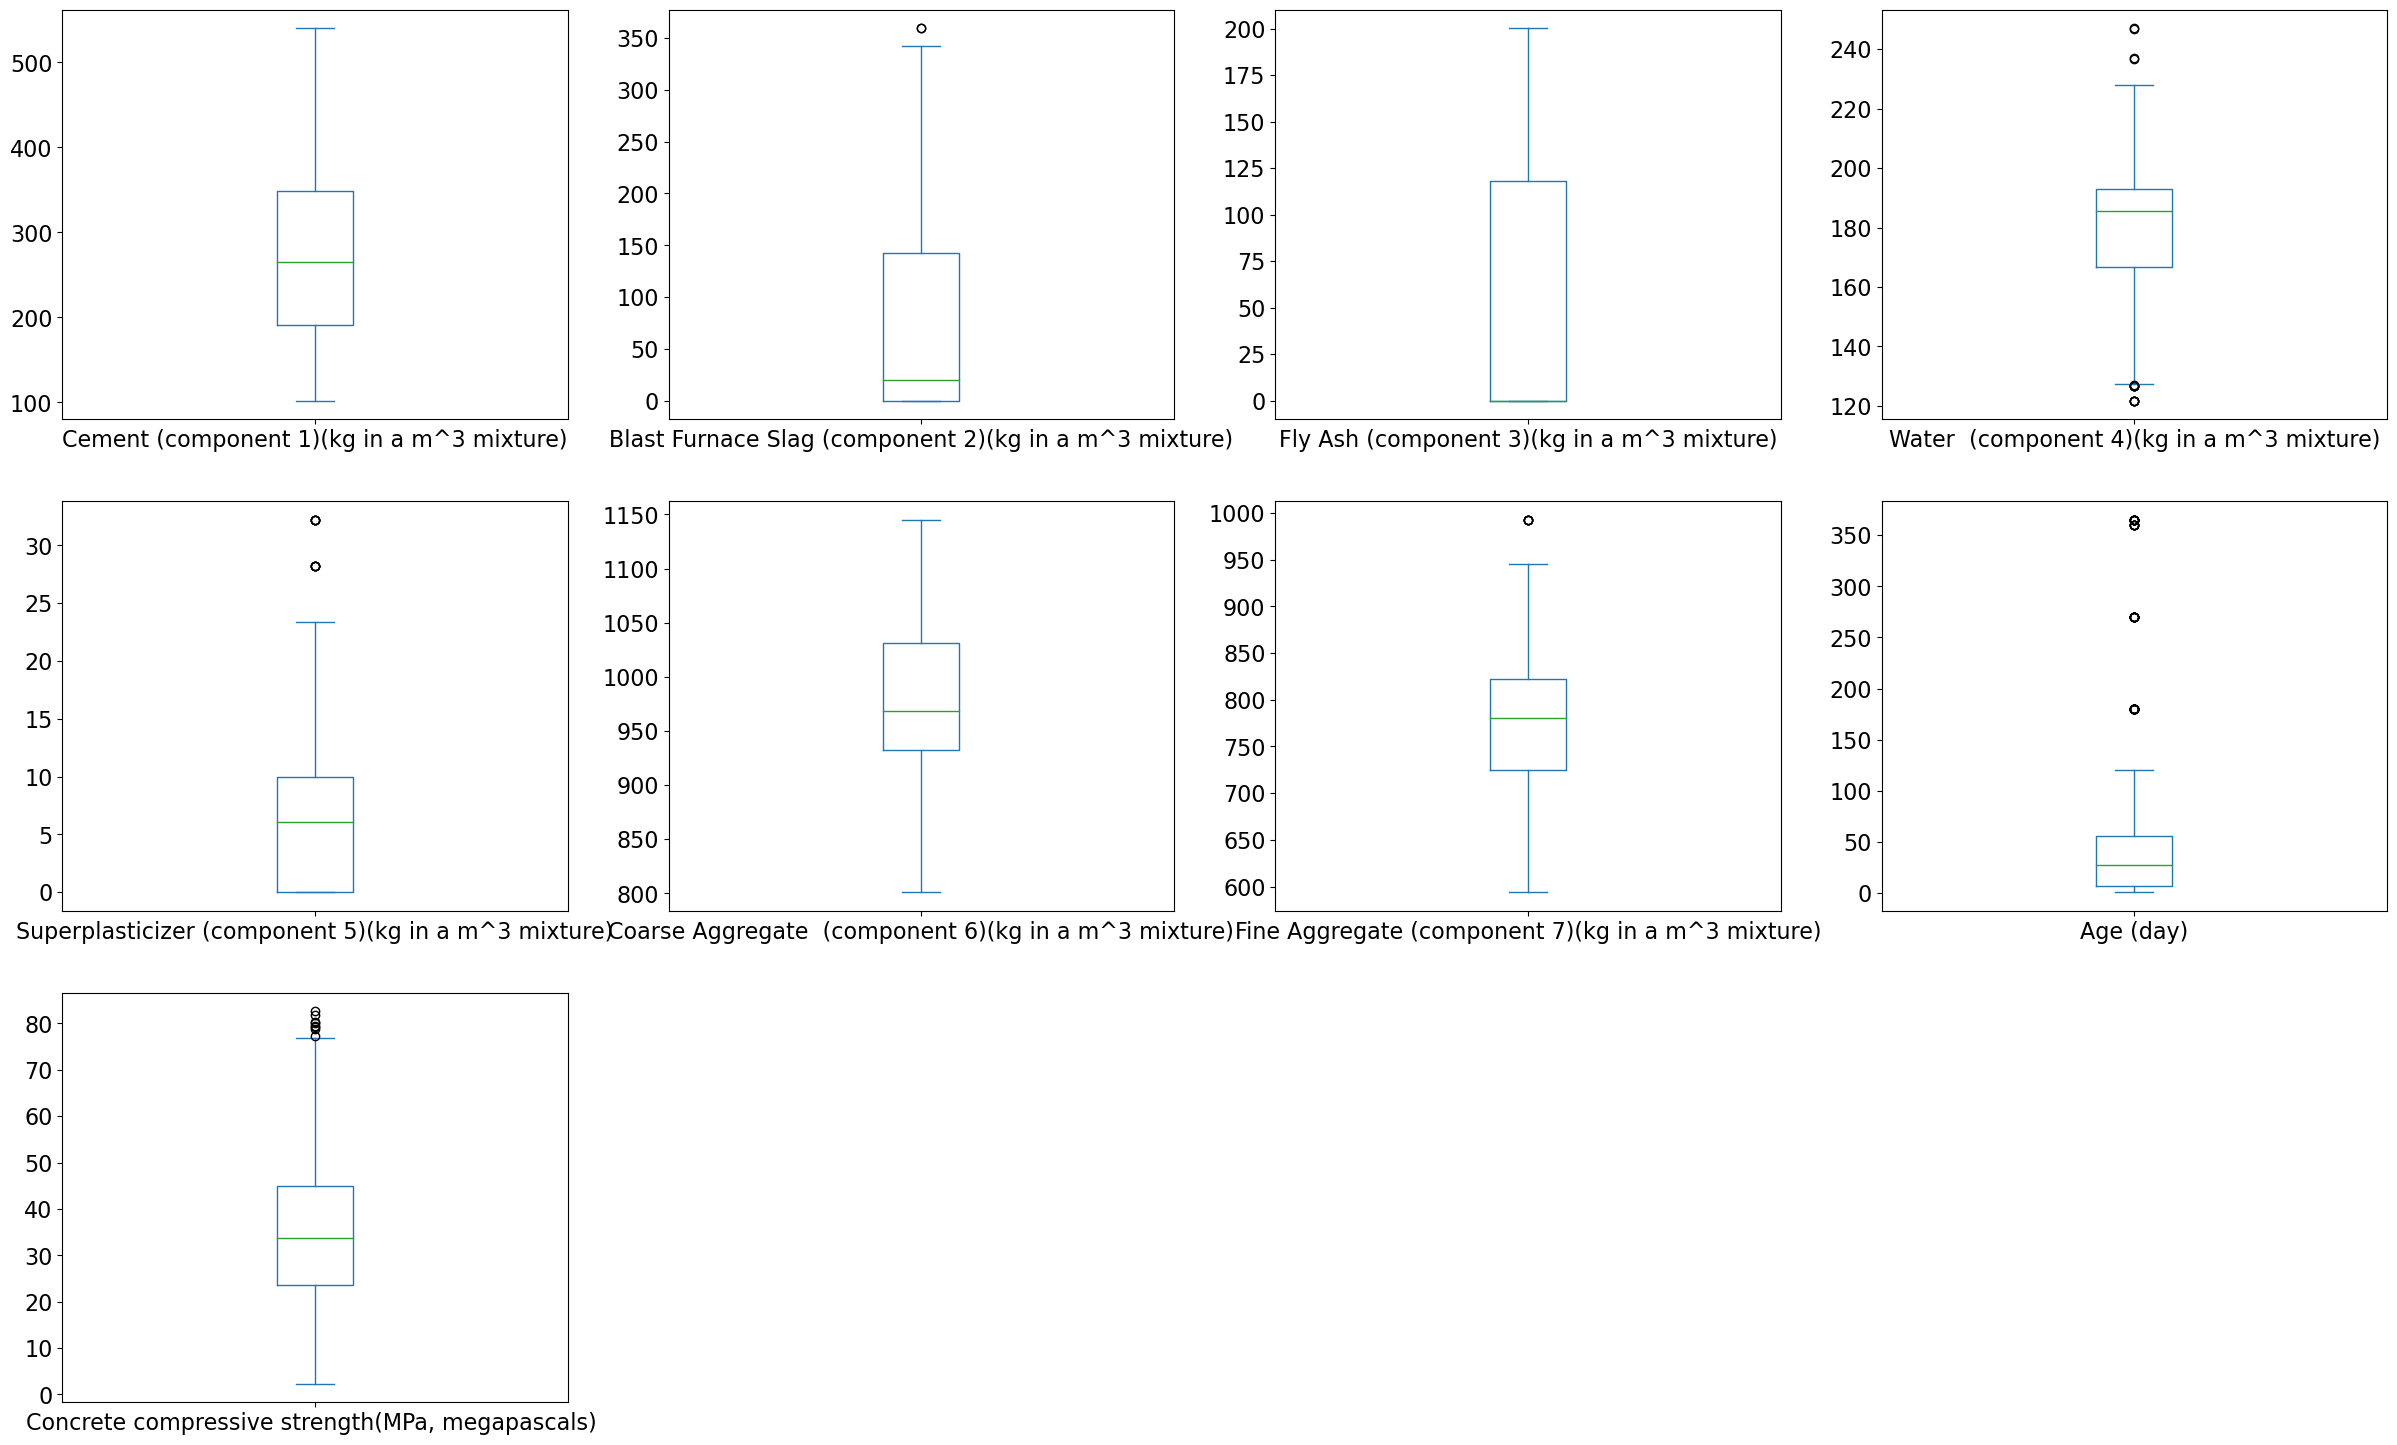

In [8]:
# Determine the outlier
data_mean = data.iloc[:,:]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=16, figsize=(30,50));

In [9]:
#Fucntion of determine the range of outlier based on lower and upper bound of the dataset
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [10]:
index_list = []
for feature in ['Cement (component 1)(kg in a m^3 mixture)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)','Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)','Age (day)']:
    index_list.extend(outliers(data,feature))

In [11]:
# Function to remove the outlier that determine from the original dataset
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [12]:
data_cleaned = remove(data,index_list)

In [13]:
data_cleaned.shape

(919, 9)

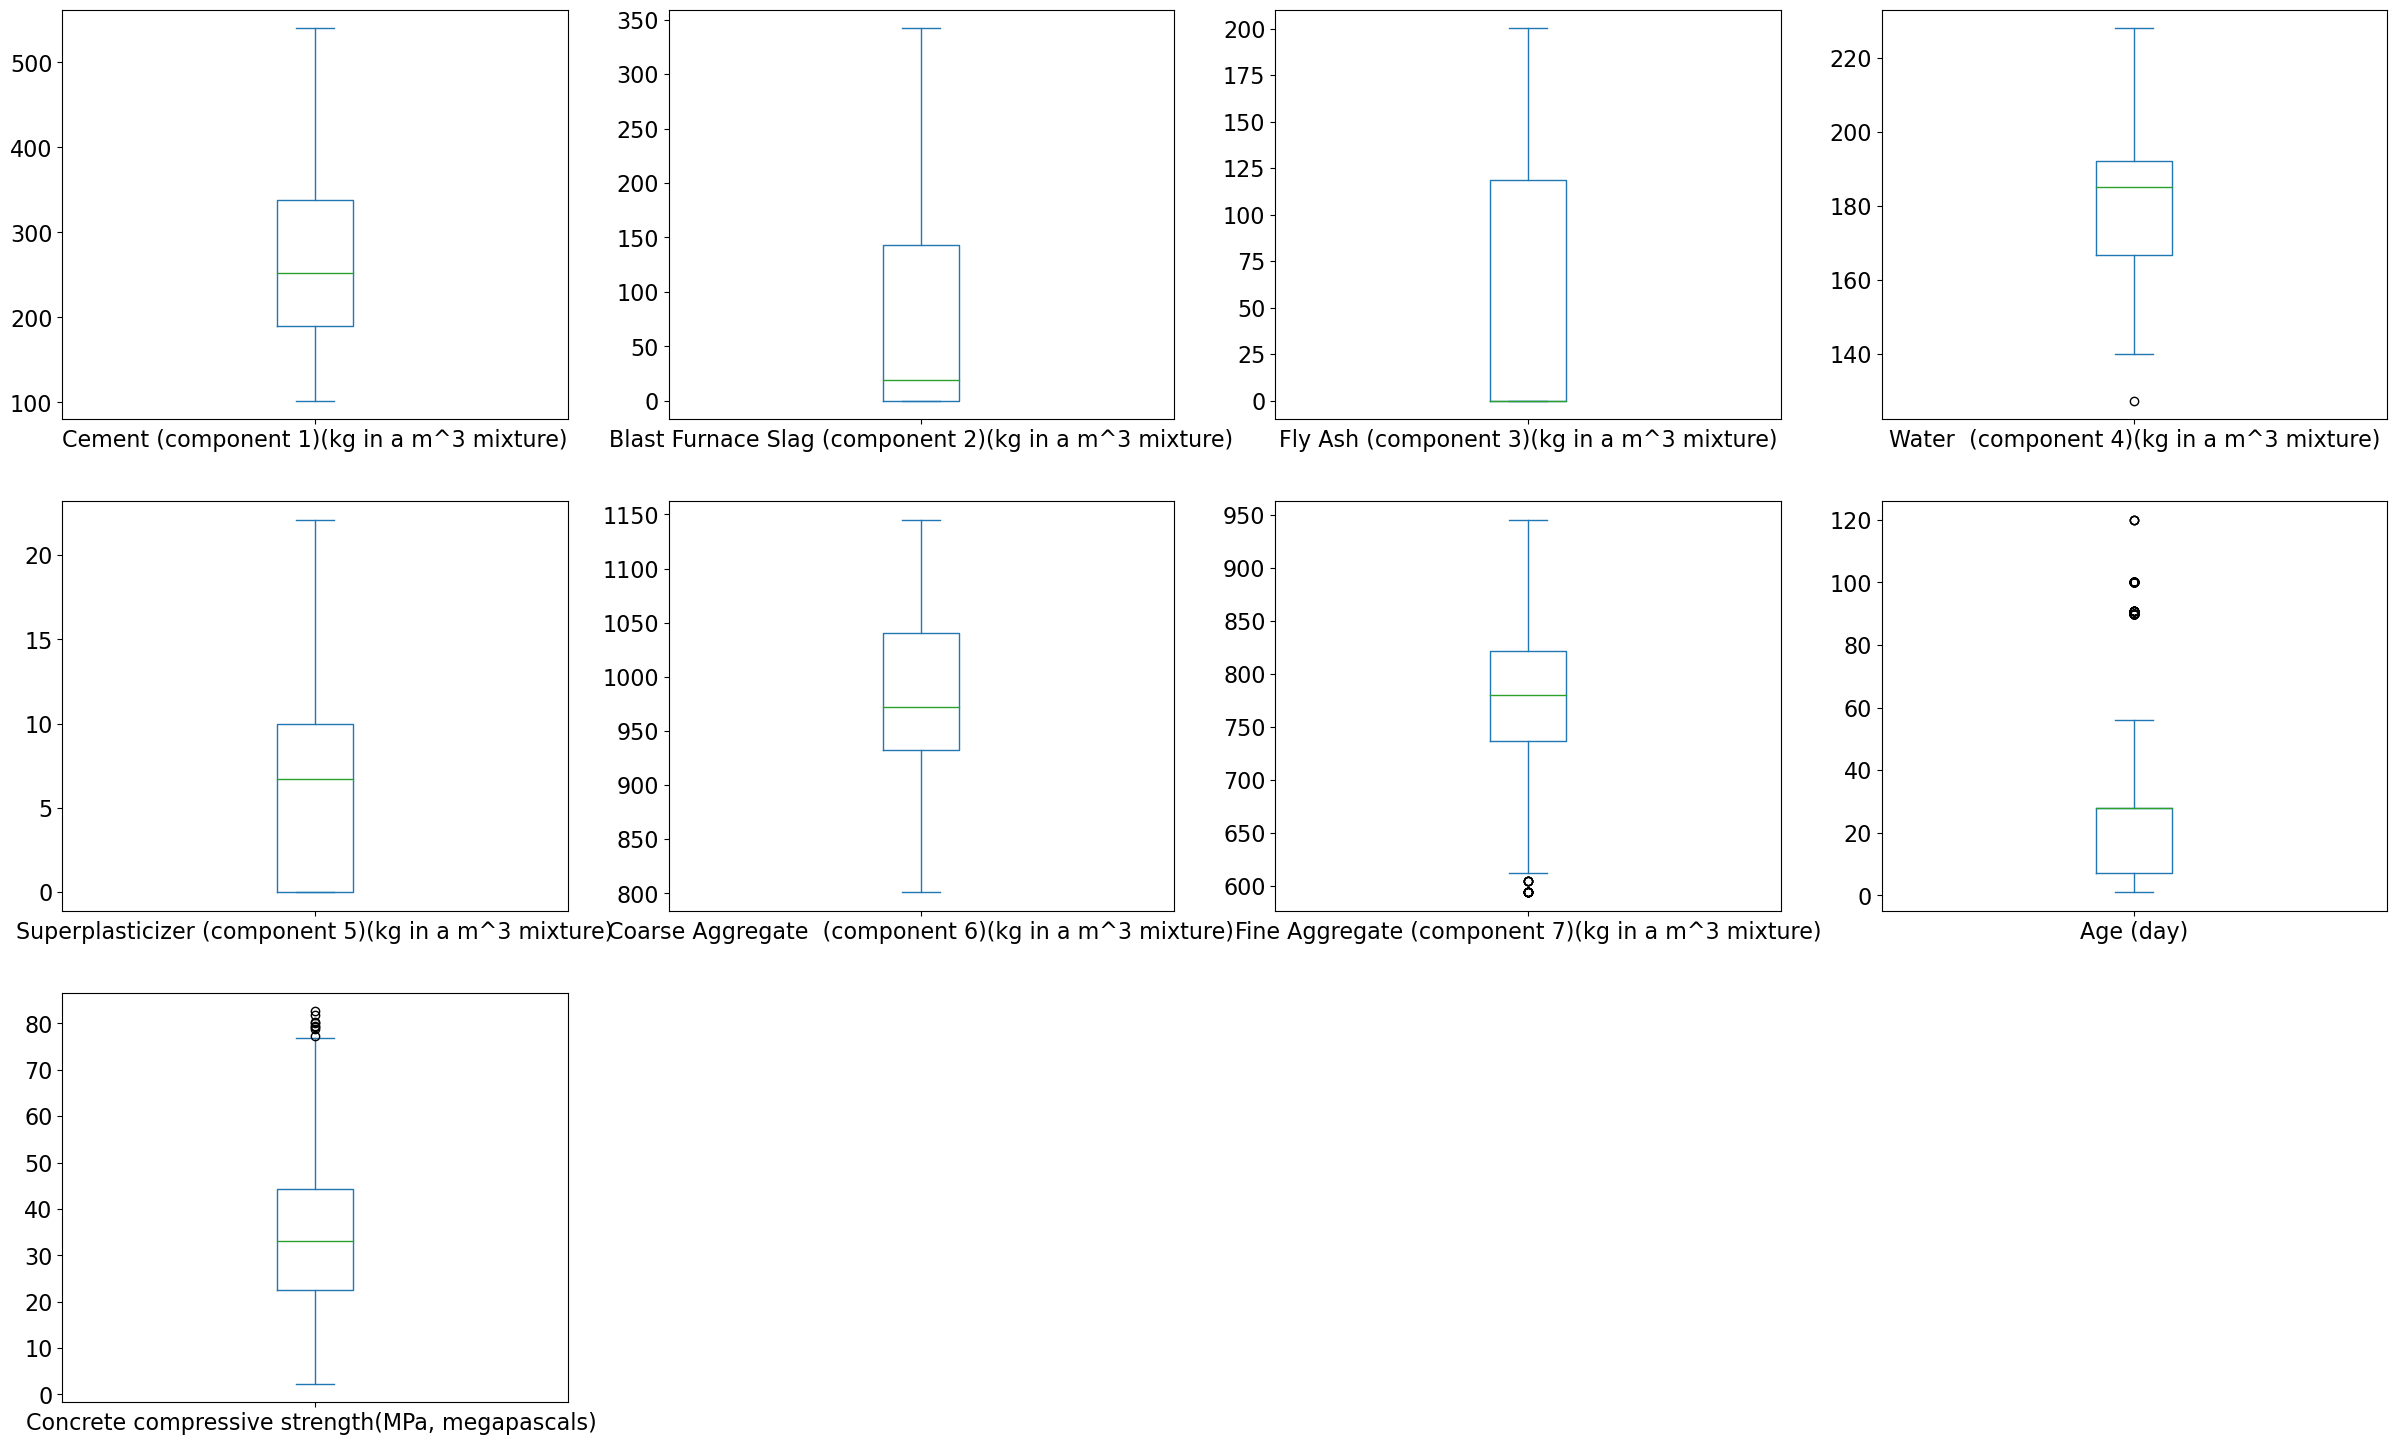

In [14]:
# Visualize the dataset after removing outlier
# There are still some outlier remain but mostly is removed
data_mean = data_cleaned.iloc[:,:]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=16, figsize=(30,50));

<AxesSubplot:>

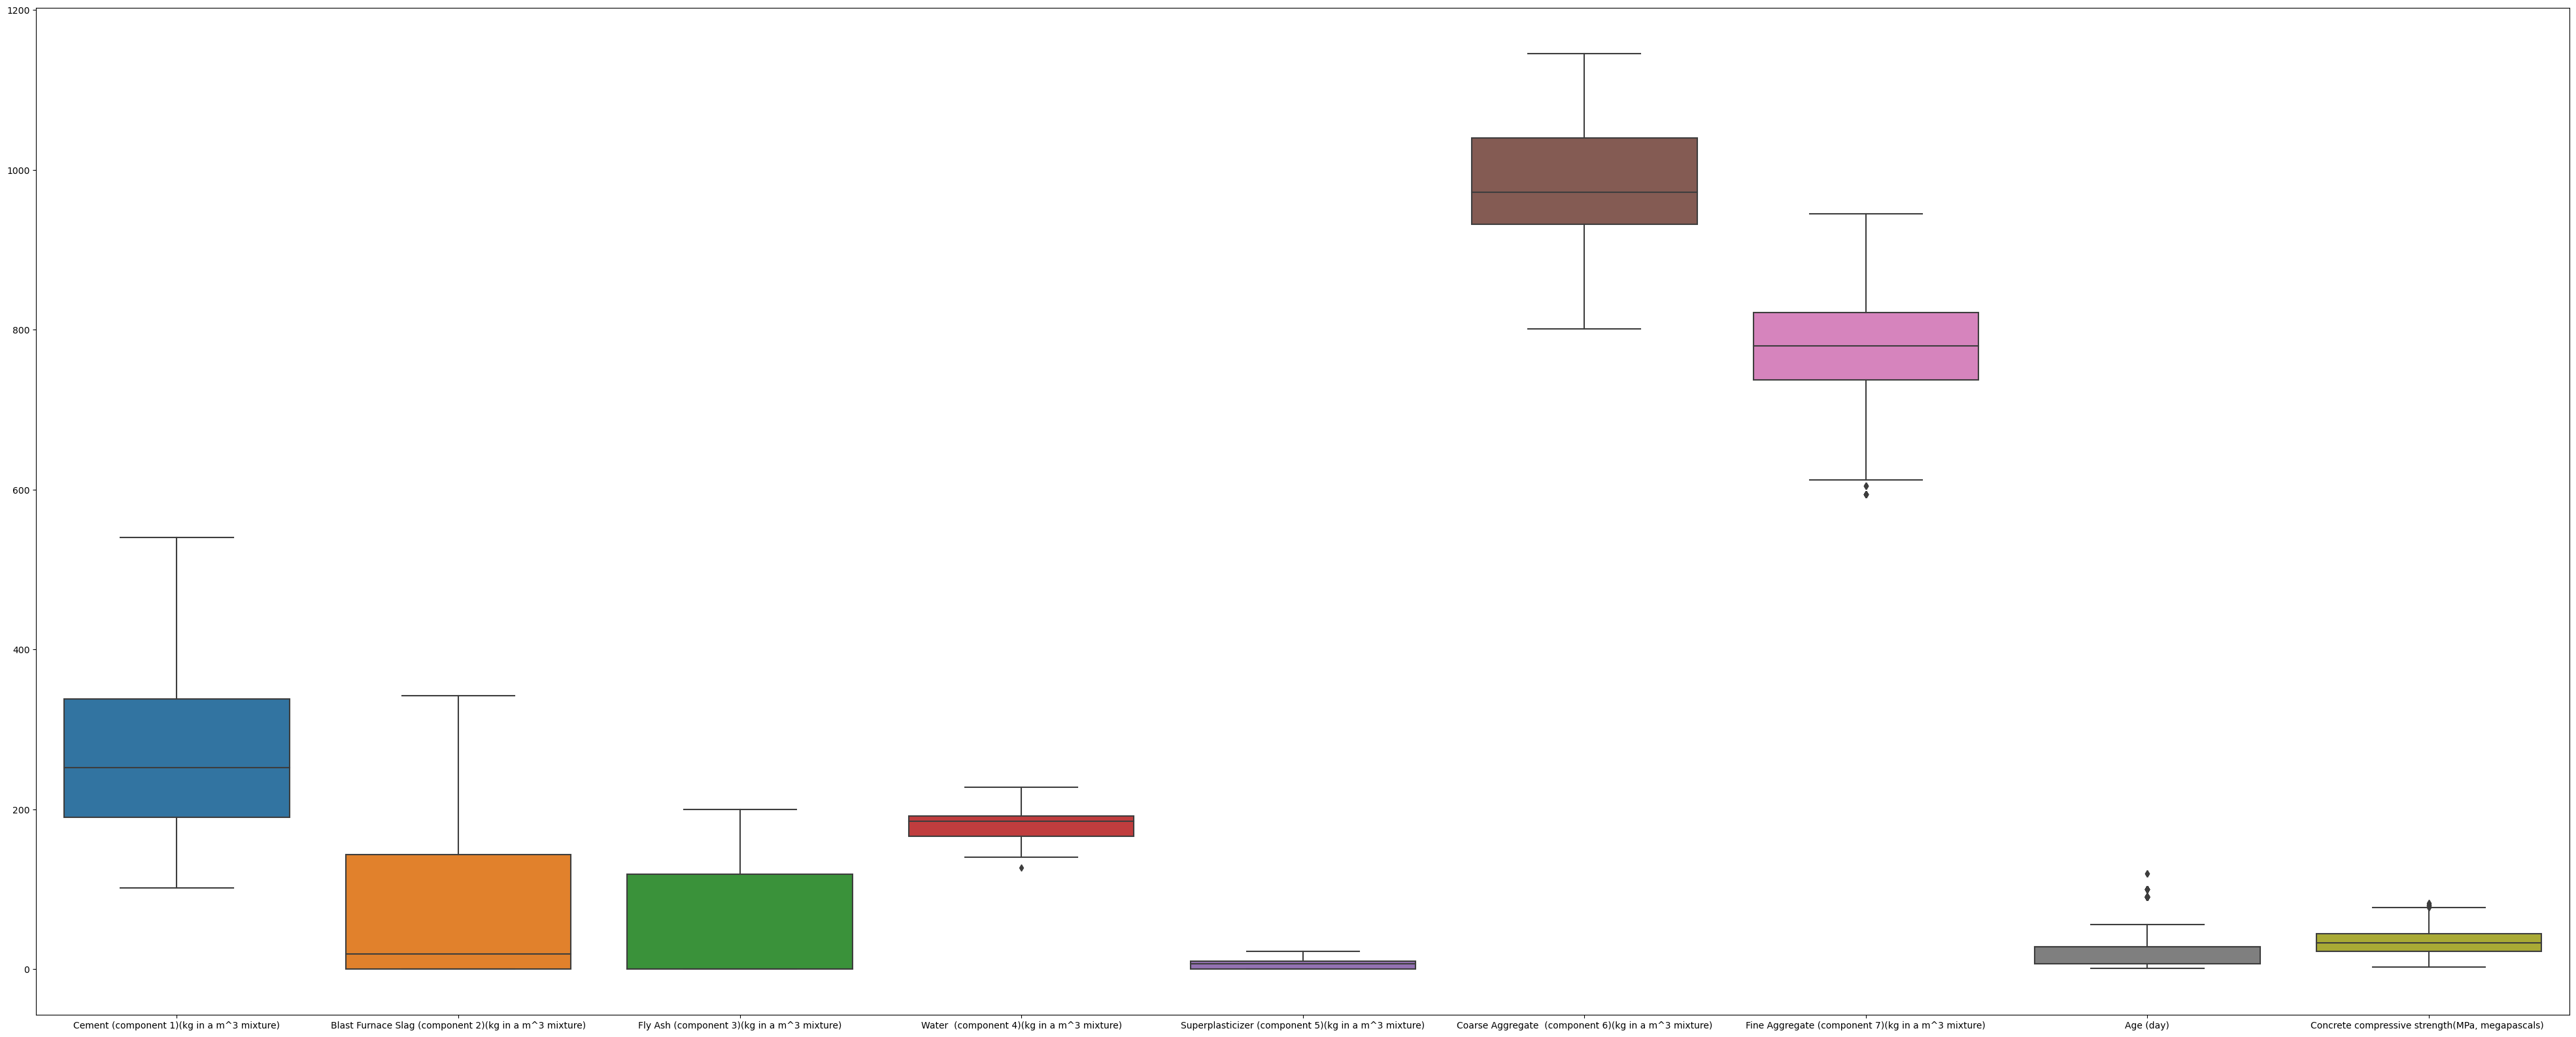

In [15]:
fig,ax=plot.subplots(1,figsize=(50,20))
sns.boxplot(data=data_cleaned.iloc[:, :],ax=ax) 

## HeatMap

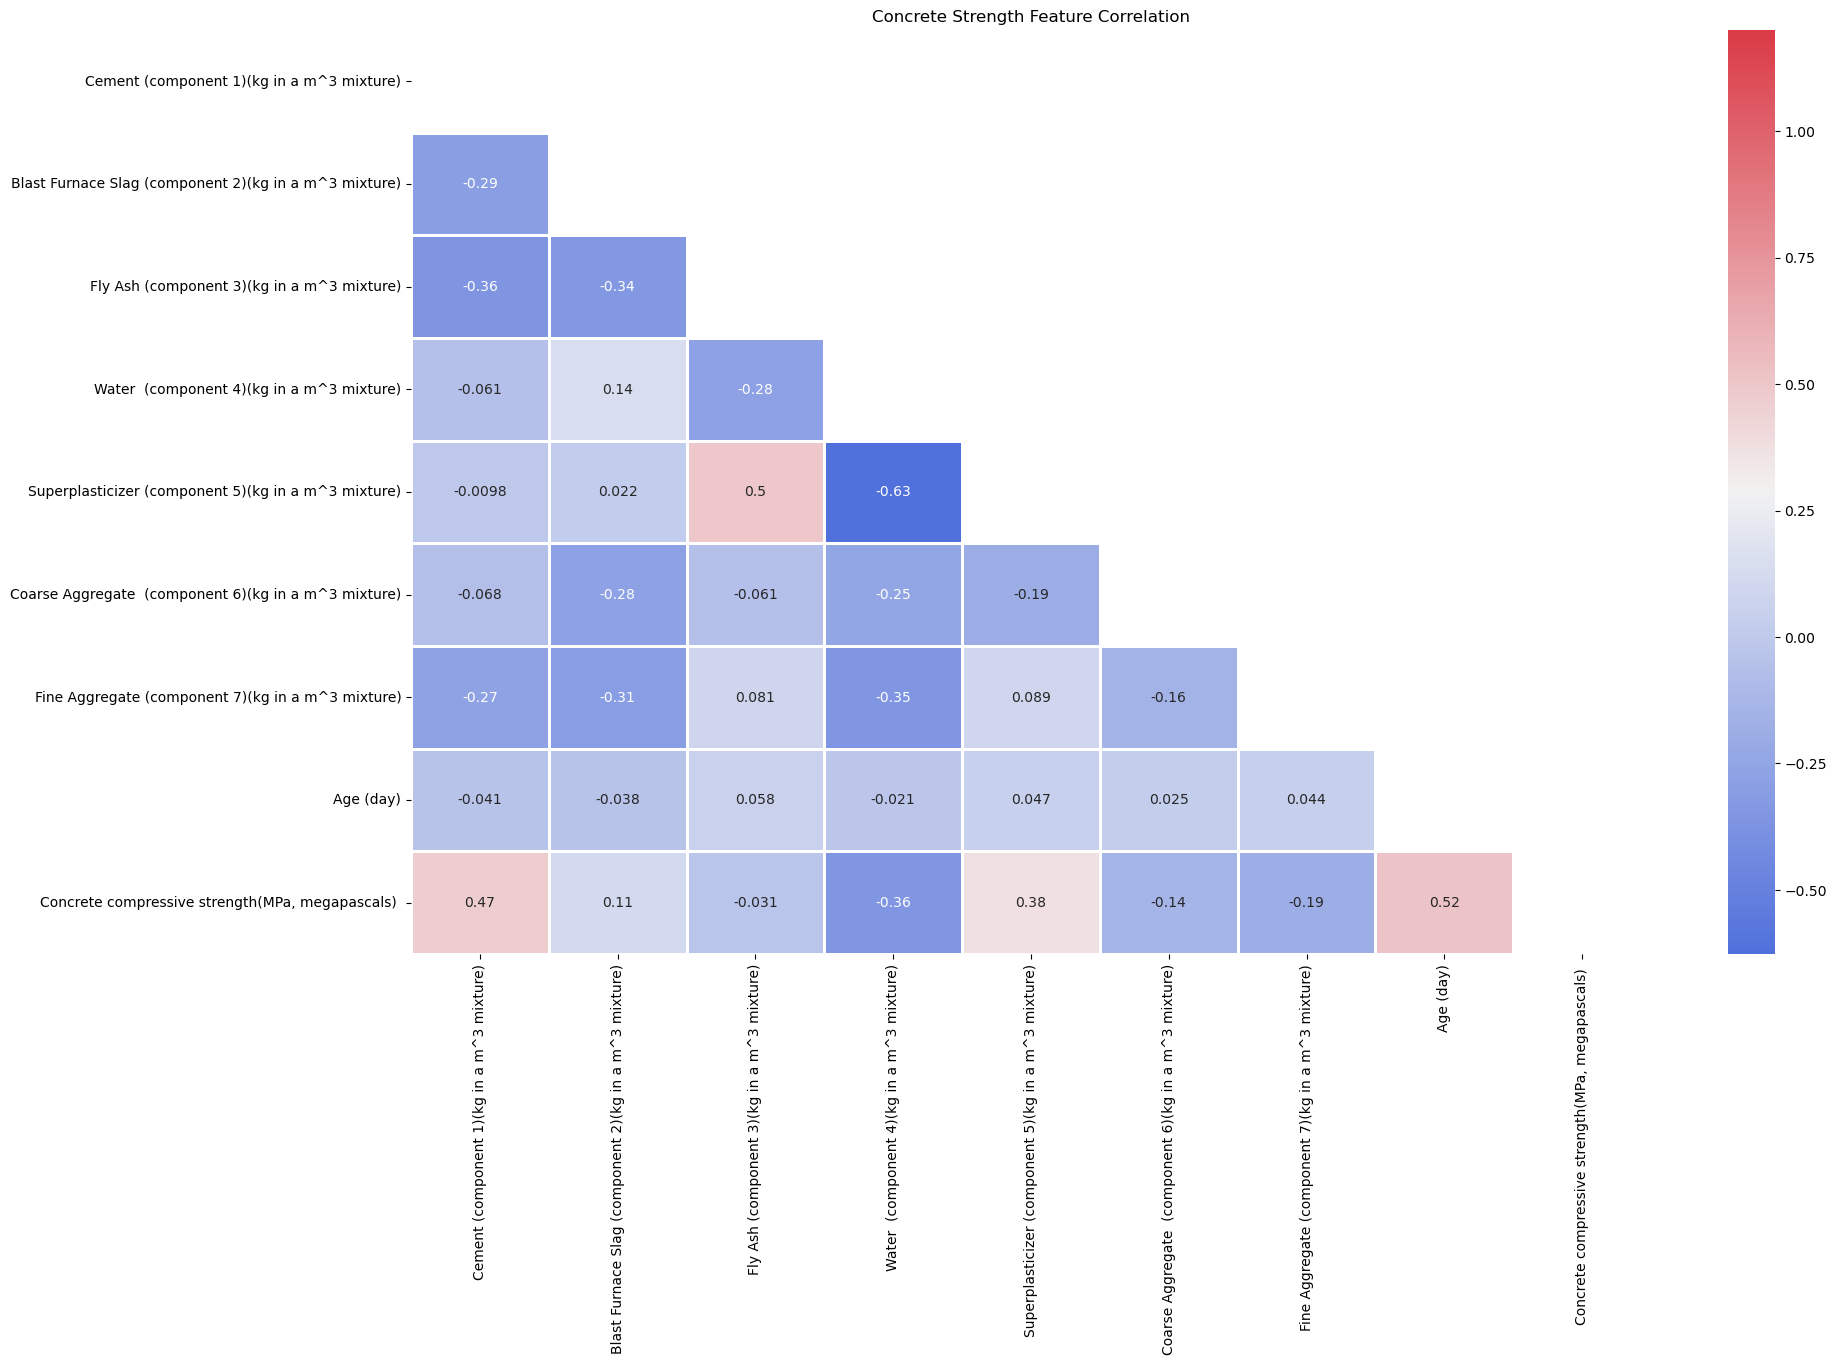

In [16]:
# Find and determine the corrrelation between data 
corrMatt = data_cleaned.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plot.subplots(figsize=(20,12))
plot.title('Concrete Strength Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

## Normalize data

In [17]:
# Normalize the features by using zero mean normalisation
from sklearn.preprocessing import StandardScaler

x = data_cleaned.iloc[:,:-1]
scaler = StandardScaler()
scaler.fit(x)

# transform the test test
Xs = scaler.transform(x)
Xs

array([[ 2.62175847, -0.83405014, -0.92165195, ...,  0.81865248,
        -1.32135637, -0.15158958],
       [ 2.62175847, -0.83405014, -0.92165195, ...,  1.01233482,
        -1.32135637, -0.15158958],
       [-0.07184464,  0.48474642, -0.92165195, ..., -0.57586039,
        -1.40118666,  2.02788842],
       ...,
       [-1.22694817,  0.77858354,  0.7631786 , ..., -1.08718177,
         0.06236868, -0.15158958],
       [-1.12274308,  1.32576843, -0.92165195, ...,  0.16787981,
         0.18078361, -0.15158958],
       [-0.12198105,  0.32857314,  0.29310157, ..., -1.44743093,
        -0.18377472, -0.15158958]])

<AxesSubplot:>

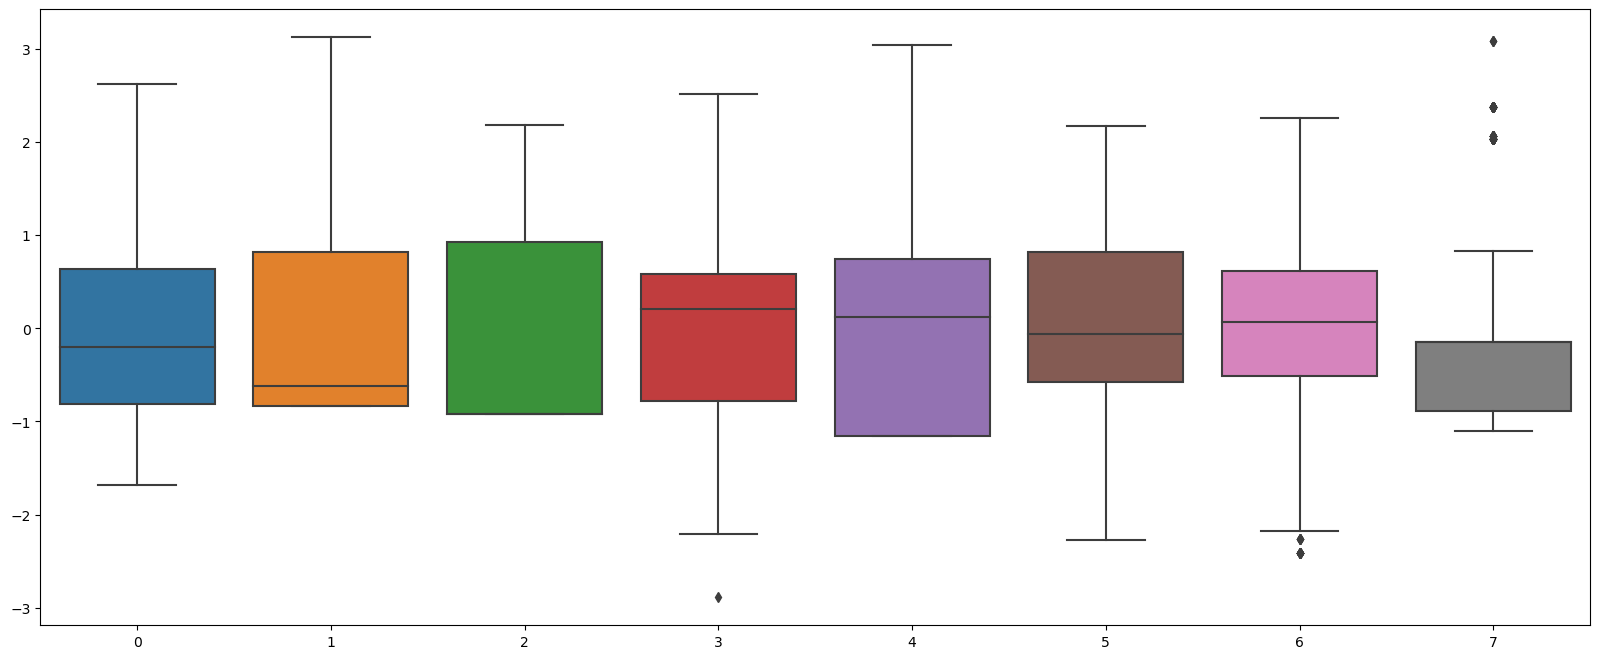

In [18]:
fig,ax=plot.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

In [19]:
# Assign the target value that used for prediction
y = data_cleaned['Concrete compressive strength(MPa, megapascals) ']
y

0       79.986111
1       61.887366
5       47.029847
7       36.447770
8       45.854291
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 919, dtype: float64

# Split dataset into test and training set

In [20]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1)

# Hyperparameter Tuning

In [21]:
# Decision Tree model function with random state = 1
model  = DecisionTreeRegressor(random_state = 1)

In [22]:
# Multiple type of value in each parameter for comparison
parameter_space={
            "max_depth" : [None,1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":[None,"auto","log2","sqrt"],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
                }

In [23]:
# Different type of value for parameter for comparison
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(model , parameter_space, n_jobs=-1, cv=5)
grid_model.fit(Xs_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 3, 5, 7, 9, 11, 12],
                         'max_features': [None, 'auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2]})

In [24]:
# Show the best parameter setting
print('Best parameters found:\n', grid_model.best_params_)

Best parameters found:
 {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.0}


In [25]:
# Show all results of the grid search
means = grid_model.cv_results_['mean_test_score']
stds = grid_model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_model .cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.755 (+/-0.077) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0}
0.533 (+/-0.068) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1}
0.359 (+/-0.058) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.2}
0.764 (+/-0.035) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.0}
0.533 (+/-0.068) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1}
0.359 (+/-0.058) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.2}
0.754 (+/-0.066) for {'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0}

# Apply Default Hyperparameter to Decision Tree

In [26]:
# All parameter settings include C are default to determine the basic SVM model
# Only the random state is set to 1 to prevent obtain different result in every run
default_model = DecisionTreeRegressor(random_state=1)
default_rgs = default_model.fit(Xs_train,y_train)
default_prediction = default_rgs.predict(Xs_test)

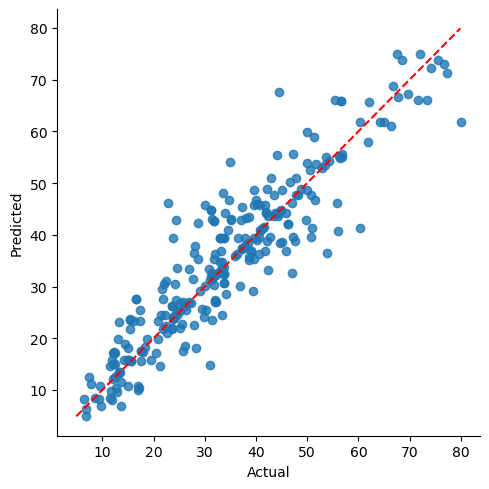

In [27]:
# Plot the prediction result with actual value for visualization
default_data_results = pd.DataFrame({'Actual':y_test,'Predicted':default_prediction})
sns.lmplot(x='Actual',y='Predicted',data=default_data_results,fit_reg=False)
default_d_line= np.arange(default_data_results.min().min(), default_data_results.max().max())
plot.plot(default_d_line, default_d_line, color='red', linestyle='--')
plot.show()

In [28]:
# Compare the difference between the predicted value and actual value
default_pred_data = pd.DataFrame({'Actual':y_test,'Predicted':default_prediction,'Difference':y_test-default_prediction})
print(default_pred_data)

         Actual  Predicted  Difference
355   47.711739  38.769235    8.942504
692   39.700028  48.587374   -8.887346
392   47.277369  55.647608   -8.370239
432   26.200088  18.415904    7.784184
259   13.334466  13.541309   -0.206843
...         ...        ...         ...
1021  31.875165  42.637196  -10.762031
115   35.101223  42.795775   -7.694552
625   32.922479  34.680643   -1.758164
690   23.523542  21.859147    1.664395
897   40.934190  40.934880   -0.000689

[276 rows x 3 columns]


# Apply Best Hyperparameter to Decision Tree

In [29]:
# If the below opt_model is undetermined or facing problem to run,
# please uncomment the below model function before run as it is obtained from GridSearch and remove the one below.

# opt_model = DecisionTreeRegressor( max_depth = None,
#                                   min_samples_leaf = 2,
#                                   min_weight_fraction_leaf = 0.0,
#                                   max_features = None,
#                                   max_leaf_nodes = None,
#                                  random_state=1)

# Insert the best parameter settings obtained from grid search
opt_model = DecisionTreeRegressor(random_state=1).set_params(**grid_model.best_params_)


opt_rgs = opt_model.fit(Xs_train, y_train)
opt_prediction = opt_rgs.predict(Xs_test)
opt_model

DecisionTreeRegressor(min_samples_leaf=2, random_state=1)

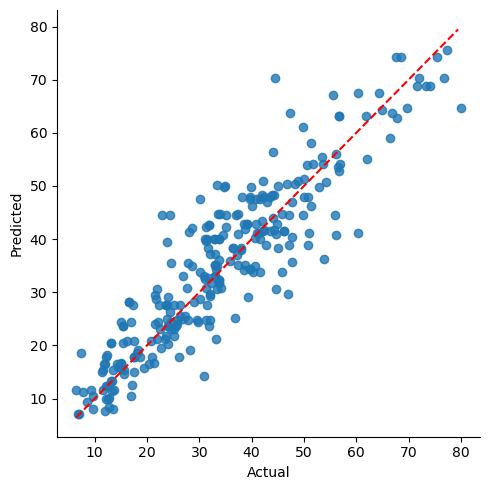

In [30]:
# Plot the optimzed prediction result with actual value for visualization
data_results = pd.DataFrame({'Actual':y_test,'Predicted':opt_prediction})
sns.lmplot(x='Actual',y='Predicted',data=data_results,fit_reg=False)
d_line= np.arange(data_results.min().min(), data_results.max().max())
plot.plot(d_line, d_line, color='red', linestyle='--')
plot.show()

In [31]:
# Compare the difference between the predicted value and actual value
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':opt_prediction,'Difference':y_test-opt_prediction})
print(pred_data)


         Actual  Predicted  Difference
355   47.711739  35.676936   12.034804
692   39.700028  47.900656   -8.200628
392   47.277369  63.726953  -16.449584
432   26.200088  17.765498    8.434590
259   13.334466  11.493565    1.840901
...         ...        ...         ...
1021  31.875165  42.640643  -10.765478
115   35.101223  44.498781   -9.397558
625   32.922479  35.221881   -2.299402
690   23.523542  21.148068    2.375475
897   40.934190  41.151720   -0.217530

[276 rows x 3 columns]


# Using K-fold Cross Validation to determine the Result of Model with Default Hyperparameter 

In [32]:
#K-fold validation

# Important:
## TypeError: 'numpy.float64' object is not callable
# This error might occur due to the old version of python and numpy, if you are facing this issue please just re-import the file in that specific section.

from sklearn.model_selection import cross_val_score
# from numpy import mean
# from numpy import absolute

In [33]:
# The dataset will be split to 5 fold to perform cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [34]:
#K-Fold R2 Score
r2_scores = cross_val_score(default_model, Xs, y, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(np.mean(r2_scores),2))

K-Fold R2 score = 0.81


In [35]:
#K-Fold Mean Squared Error
MSE = cross_val_score(default_model, Xs, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(np.mean(np.absolute(MSE)),2))

K-Fold Mean Squared Error = 51.61


In [36]:
#K-Fold Root Mean Squared Error
RMSE = cross_val_score(default_model, Xs, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Root Mean Squared error =", round(np.mean(np.absolute(RMSE)),2))

K-Fold Root Mean Squared error = 7.18


# Using K-fold Cross Validation to determine the Result of Model with Optimised Hyperparameter 

In [37]:
#K-Fold R2 Score
r2_scores = cross_val_score(opt_model, Xs, y, scoring='r2', cv=cv, n_jobs=-1)
print("K-Fold R2 score =", round(np.mean(r2_scores),2))


K-Fold R2 score = 0.81


In [38]:
#K-Fold Mean Squared Error
MSE = cross_val_score(opt_model, Xs, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Mean Squared Error =", round(np.mean(np.absolute(MSE)),2))

K-Fold Mean Squared Error = 49.14


In [39]:
#K-Fold Root Mean Squared Error
RMSE = cross_val_score(opt_model, Xs, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("K-Fold Root Mean Squared error =", round(np.mean(np.absolute(RMSE)),2))

K-Fold Root Mean Squared error = 7.0
